### Importing Data Analysis Modules


In [296]:
import pandas as pd
import numpy as np
import random as rnd

### Importing Visualization Modules

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data Set

In [298]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [299]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analysing the relation between each feature

In [300]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [301]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [302]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [303]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Find number of missing values

In [304]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [305]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Dropping Cabin feature as it contains too many missing values

In [313]:
train_df = train_df.drop(["Cabin"], axis = 1)
test_df = test_df.drop(["Cabin"], axis = 1)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [248]:
corelation_train = train_df.corr()

In [249]:
corelation_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Finding missing Age values grouping by PClass

In [250]:
train_df[["Age", "Pclass"]].groupby(["Pclass"]).median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [251]:
for i in range(len(train_df)):
    if pd.isnull(train_df["Age"][i]):
        if train_df["Pclass"][i] == 1:
            train_df["Age"][i] = 37.0
        elif train_df["Pclass"][i] == 2:
            train_df["Age"][i] = 29.0
        else:
            train_df["Age"][i] = 24.0

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [252]:
test_df[["Age", "Pclass"]].groupby(["Pclass"]).median()

,Age
Pclass,
1,42.0
2,26.5
3,24.0


In [253]:
for i in range(len(test_df)):
    if pd.isnull(test_df["Age"][i]):
        if test_df["Pclass"][i] == 1:
            test_df["Age"][i] = 42.0
        elif test_df["Pclass"][i] == 2:
            test_df["Age"][i] = 26.0
        else:
            test_df["Age"][i] = 24.0

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [254]:
train_df["Age"].isna().sum()

0

In [255]:
test_df["Age"].isna().sum()

0

### Creating a new feature containing number of members in the family

In [256]:
train_df["Family_size"] = 1
for i in range(len(train_df)):
    train_df["Family_size"][i] += train_df["SibSp"][i] + train_df["Parch"][i]

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [257]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [258]:
test_df["Family_size"] = 1
for i in range(len(test_df)):
    test_df["Family_size"][i] += test_df["SibSp"][i] + test_df["Parch"][i]

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [259]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


In [260]:
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [261]:
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

In [262]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [263]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_size    0
dtype: int64

### Converting Categorical Features

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


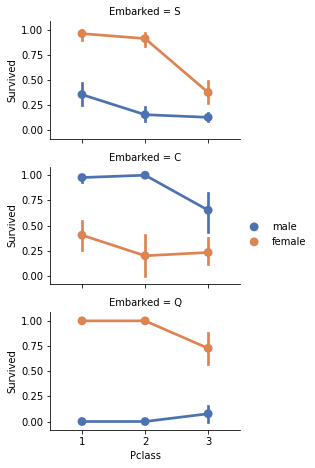

In [264]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


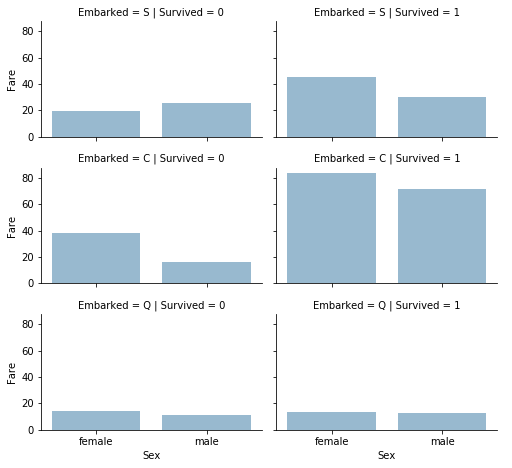

In [265]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [266]:
train_df["Gender"] = 0
for i in range(len(train_df)):
    if train_df["Sex"][i] == "male":
        train_df["Gender"][i] = 1

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [267]:
test_df["Gender"] = 0
for i in range(len(test_df)):
    if test_df["Sex"][i] == "male":
        test_df["Gender"][i] = 1

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [268]:
for i in range(len(train_df)):
    if train_df["Embarked"][i] == "C":
        train_df["Embarked"][i] = 0
    elif train_df["Embarked"][i] == "Q":
        train_df["Embarked"][i] = 1
    else:
        train_df["Embarked"][i] = 2

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [269]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,0


In [270]:
for i in range(len(test_df)):
    if test_df["Embarked"][i] == "C":
        test_df["Embarked"][i] = 0
    elif test_df["Embarked"][i] == "Q":
        test_df["Embarked"][i] = 1
    else:
        test_df["Embarked"][i] = 2

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so

### Visualizing Numerical Features

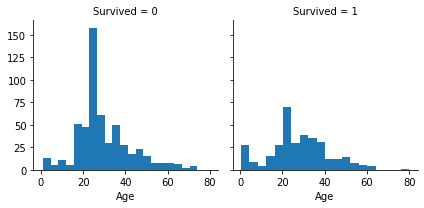

In [271]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

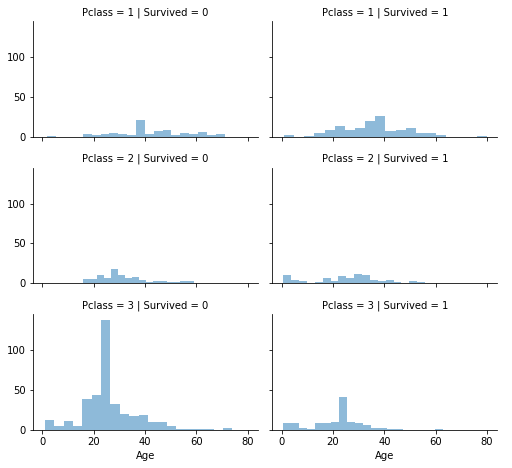

In [272]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Create a feature using Name

In [273]:
train_df["Title"] = "Rare"
for i in range(len(train_df)):
    train_df["Title"][i] = train_df["Name"][i].split(" ")[1][:-1]
    
pd.crosstab(train_df['Title'], train_df['Sex'])

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Sex,female,male
Title,,
,2,2
Billiard,0,1
Capt,0,1
Carlo,0,1
Col,0,2
Cruyssen,0,1
Don,0,1
Dr,1,6
Gordon,1,1


In [274]:
for i in range(len(train_df)):
    if train_df['Title'][i] not in ['Master', 'Miss','Mr', 'Mrs','Ms', 'Mme', 'Mile']:
        train_df['Title'][i] = "Rare"
        
    if train_df['Title'][i] == "Mile" or train_df['Title'][i] == "Ms":
        train_df['Title'][i] = "Miss"
        
    if train_df['Title'][i] == "Mme":
        train_df['Title'][i] = "Mrs"
    

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [275]:
test_df["Title"] = "Rare"
for i in range(len(test_df)):
    test_df["Title"][i] = test_df["Name"][i].split(" ")[1][:-1]

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [276]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Gender,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,1,1,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2,2,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,1,1,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2,1,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2,3,0,Mrs


In [277]:
def title_gen(tit):
    for i in range(len(tit)):
        if tit["Title"][i] == "Mr":
            tit["Title"][i] = 0
        elif tit["Title"][i] == "Mrs":
            tit["Title"][i] = 1
        elif tit["Title"][i] == "Master":
            tit["Title"][i] = 2
        elif tit["Title"][i] == "Ms":
            tit["Title"][i] = 3
        else:
            tit["Title"][i] = 4

In [278]:
title_gen(train_df)
title_gen(test_df)

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':

### Creating Age and Fare bins

In [279]:
def age_group(df):
    for i in range(len(df)):
        if df["Age"][i]<4:
            df["Age"][i] = 0
        elif df["Age"][i]<14 and df["Age"][i]>=4:
            df["Age"][i] = 1
        elif df["Age"][i]<35 and df["Age"][i]>=14:
            df["Age"][i] = 2
        elif df["Age"][i]<55 and df["Age"][i]>=35:
            df["Age"][i] = 3
        else:
            df["Age"][i] = 4

In [280]:
age_group(train_df)
age_group(test_df)

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after r

In [281]:
def fare(df):
    for i in range(len(df)):
        if df["Fare"][i]<8:
            df["Fare"][i] = 0
        elif df["Fare"][i]<18 and df["Fare"][i]>=8:
            df["Fare"][i] = 1
        else:
            df["Fare"][i] = 2

In [282]:
fare(train_df)
fare(test_df)

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [283]:
test_df = test_df.drop(["Name", "PassengerId", "Sex", "SibSp", "Parch", "Ticket"], axis = 1)
train_df = train_df.drop(["Name", "PassengerId", "Sex", "SibSp", "Parch", "Ticket"], axis = 1)

In [284]:
train_df.head()

,Survived,Pclass,Age,Fare,Embarked,Family_size,Gender,Title
0,0,3,2.0,0.0,2,2,1,0
1,1,1,3.0,2.0,0,2,0,1
2,1,3,2.0,0.0,2,1,0,4
3,1,1,3.0,2.0,2,2,0,1
4,0,3,3.0,1.0,2,1,1,0


### Create Model

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [286]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [287]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.02

In [288]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/Users/suyoga/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.73

In [289]:
knn = KNeighborsClassifier(n_neighbors = 5) #cross validation gave n = 5 as best parameter
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [290]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

In [291]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.01

In [292]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.65

In [293]:
sub = pd.read_csv("gender_submission.csv")

### Cross Validation for Catboost

In [294]:
from catboost import CatBoostClassifier
cat_boost = CatBoostClassifier()
cat_boost.fit(X_train, Y_train)
y_pred = cat_boost.predict(X_test)

Learning rate set to 0.009807
0:	learn: 0.6857194	total: 3.63ms	remaining: 3.63s
1:	learn: 0.6789411	total: 7ms	remaining: 3.49s
2:	learn: 0.6723289	total: 10.6ms	remaining: 3.53s
3:	learn: 0.6661076	total: 13ms	remaining: 3.23s
4:	learn: 0.6610708	total: 15ms	remaining: 2.98s
5:	learn: 0.6548862	total: 17.4ms	remaining: 2.89s
6:	learn: 0.6494430	total: 20.3ms	remaining: 2.88s
7:	learn: 0.6439734	total: 22.5ms	remaining: 2.78s
8:	learn: 0.6385402	total: 25.8ms	remaining: 2.85s
9:	learn: 0.6334363	total: 28.1ms	remaining: 2.79s
10:	learn: 0.6278731	total: 30.6ms	remaining: 2.75s
11:	learn: 0.6223970	total: 33.1ms	remaining: 2.72s
12:	learn: 0.6180324	total: 35.1ms	remaining: 2.66s
13:	learn: 0.6135521	total: 37.3ms	remaining: 2.63s
14:	learn: 0.6089461	total: 40.2ms	remaining: 2.64s
15:	learn: 0.6037876	total: 43ms	remaining: 2.64s
16:	learn: 0.5996353	total: 45.1ms	remaining: 2.61s
17:	learn: 0.5953190	total: 47.4ms	remaining: 2.59s
18:	learn: 0.5923015	total: 49.7ms	remaining: 2.57s
1

196:	learn: 0.3838330	total: 524ms	remaining: 2.14s
197:	learn: 0.3837439	total: 527ms	remaining: 2.13s
198:	learn: 0.3836746	total: 530ms	remaining: 2.13s
199:	learn: 0.3833305	total: 533ms	remaining: 2.13s
200:	learn: 0.3829505	total: 536ms	remaining: 2.13s
201:	learn: 0.3826771	total: 539ms	remaining: 2.13s
202:	learn: 0.3825942	total: 541ms	remaining: 2.12s
203:	learn: 0.3825663	total: 542ms	remaining: 2.12s
204:	learn: 0.3822439	total: 545ms	remaining: 2.12s
205:	learn: 0.3821974	total: 548ms	remaining: 2.11s
206:	learn: 0.3818283	total: 551ms	remaining: 2.11s
207:	learn: 0.3817136	total: 555ms	remaining: 2.11s
208:	learn: 0.3814395	total: 559ms	remaining: 2.11s
209:	learn: 0.3812708	total: 561ms	remaining: 2.11s
210:	learn: 0.3809272	total: 563ms	remaining: 2.1s
211:	learn: 0.3805694	total: 567ms	remaining: 2.11s
212:	learn: 0.3803765	total: 569ms	remaining: 2.1s
213:	learn: 0.3801210	total: 572ms	remaining: 2.1s
214:	learn: 0.3799353	total: 574ms	remaining: 2.1s
215:	learn: 0.37

386:	learn: 0.3563826	total: 1.06s	remaining: 1.68s
387:	learn: 0.3563409	total: 1.07s	remaining: 1.69s
388:	learn: 0.3563022	total: 1.07s	remaining: 1.69s
389:	learn: 0.3561797	total: 1.08s	remaining: 1.69s
390:	learn: 0.3560767	total: 1.08s	remaining: 1.69s
391:	learn: 0.3559680	total: 1.09s	remaining: 1.69s
392:	learn: 0.3558688	total: 1.09s	remaining: 1.69s
393:	learn: 0.3556918	total: 1.1s	remaining: 1.69s
394:	learn: 0.3556220	total: 1.1s	remaining: 1.69s
395:	learn: 0.3554260	total: 1.1s	remaining: 1.68s
396:	learn: 0.3553310	total: 1.11s	remaining: 1.68s
397:	learn: 0.3553134	total: 1.11s	remaining: 1.68s
398:	learn: 0.3551900	total: 1.11s	remaining: 1.68s
399:	learn: 0.3551005	total: 1.12s	remaining: 1.68s
400:	learn: 0.3550548	total: 1.12s	remaining: 1.67s
401:	learn: 0.3548951	total: 1.12s	remaining: 1.67s
402:	learn: 0.3547763	total: 1.13s	remaining: 1.67s
403:	learn: 0.3546735	total: 1.14s	remaining: 1.67s
404:	learn: 0.3545406	total: 1.14s	remaining: 1.67s
405:	learn: 0.3

571:	learn: 0.3423520	total: 1.73s	remaining: 1.29s
572:	learn: 0.3422490	total: 1.74s	remaining: 1.3s
573:	learn: 0.3421295	total: 1.75s	remaining: 1.3s
574:	learn: 0.3421136	total: 1.76s	remaining: 1.3s
575:	learn: 0.3420853	total: 1.76s	remaining: 1.3s
576:	learn: 0.3420448	total: 1.77s	remaining: 1.29s
577:	learn: 0.3420116	total: 1.77s	remaining: 1.29s
578:	learn: 0.3419184	total: 1.77s	remaining: 1.29s
579:	learn: 0.3418298	total: 1.78s	remaining: 1.29s
580:	learn: 0.3418065	total: 1.78s	remaining: 1.28s
581:	learn: 0.3417372	total: 1.79s	remaining: 1.28s
582:	learn: 0.3416862	total: 1.79s	remaining: 1.28s
583:	learn: 0.3416841	total: 1.8s	remaining: 1.28s
584:	learn: 0.3416685	total: 1.8s	remaining: 1.28s
585:	learn: 0.3416417	total: 1.8s	remaining: 1.27s
586:	learn: 0.3415775	total: 1.81s	remaining: 1.27s
587:	learn: 0.3414800	total: 1.81s	remaining: 1.27s
588:	learn: 0.3414126	total: 1.82s	remaining: 1.27s
589:	learn: 0.3414124	total: 1.82s	remaining: 1.26s
590:	learn: 0.34135

738:	learn: 0.3323614	total: 2.25s	remaining: 796ms
739:	learn: 0.3323322	total: 2.26s	remaining: 793ms
740:	learn: 0.3322984	total: 2.26s	remaining: 790ms
741:	learn: 0.3322845	total: 2.26s	remaining: 787ms
742:	learn: 0.3321927	total: 2.27s	remaining: 784ms
743:	learn: 0.3320926	total: 2.27s	remaining: 781ms
744:	learn: 0.3320456	total: 2.27s	remaining: 778ms
745:	learn: 0.3319643	total: 2.27s	remaining: 774ms
746:	learn: 0.3319354	total: 2.28s	remaining: 771ms
747:	learn: 0.3318958	total: 2.28s	remaining: 768ms
748:	learn: 0.3318330	total: 2.28s	remaining: 765ms
749:	learn: 0.3317507	total: 2.28s	remaining: 761ms
750:	learn: 0.3316952	total: 2.29s	remaining: 758ms
751:	learn: 0.3315987	total: 2.29s	remaining: 755ms
752:	learn: 0.3315664	total: 2.29s	remaining: 752ms
753:	learn: 0.3315308	total: 2.29s	remaining: 748ms
754:	learn: 0.3315023	total: 2.3s	remaining: 745ms
755:	learn: 0.3314229	total: 2.3s	remaining: 742ms
756:	learn: 0.3313948	total: 2.3s	remaining: 739ms
757:	learn: 0.3

898:	learn: 0.3240489	total: 2.79s	remaining: 313ms
899:	learn: 0.3239947	total: 2.79s	remaining: 310ms
900:	learn: 0.3239645	total: 2.8s	remaining: 307ms
901:	learn: 0.3239236	total: 2.8s	remaining: 304ms
902:	learn: 0.3238383	total: 2.8s	remaining: 301ms
903:	learn: 0.3237913	total: 2.8s	remaining: 298ms
904:	learn: 0.3237174	total: 2.81s	remaining: 295ms
905:	learn: 0.3236891	total: 2.81s	remaining: 291ms
906:	learn: 0.3236644	total: 2.81s	remaining: 288ms
907:	learn: 0.3236128	total: 2.81s	remaining: 285ms
908:	learn: 0.3235685	total: 2.82s	remaining: 282ms
909:	learn: 0.3235288	total: 2.82s	remaining: 279ms
910:	learn: 0.3234958	total: 2.82s	remaining: 276ms
911:	learn: 0.3234513	total: 2.82s	remaining: 272ms
912:	learn: 0.3234039	total: 2.83s	remaining: 269ms
913:	learn: 0.3233706	total: 2.83s	remaining: 266ms
914:	learn: 0.3233286	total: 2.83s	remaining: 263ms
915:	learn: 0.3232436	total: 2.83s	remaining: 260ms
916:	learn: 0.3231458	total: 2.83s	remaining: 257ms
917:	learn: 0.32

In [295]:
submission = pd.DataFrame({
        "PassengerId": sub["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('tit.csv', index=False)